In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
import customfunc
import matrix

In [3]:
datanum = pd.read_csv(r'/home/tiago/documents/github/ARG-Sentinel/spreadsheets/datangs.csv')
datanum.rename(columns = {'Total length (MB)':'Total length (Mb)'}, inplace = True)

In [5]:
datastr = pd.read_csv(r'/home/tiago/documents/github/ARG-Sentinel/spreadsheets/datangs.csv')
datastr.rename(columns = {'Total length (MB)':'Total length (Mb)'}, inplace = True)

In [6]:
datanum.drop(['Contamination','Strain heterogeneity','Assembly'], axis = 1, inplace = True) #RETIRA COLUNAS

In [7]:
datastr.drop(['Contamination','Strain heterogeneity','Assembly'], axis = 1, inplace = True)

In [8]:
datastr.head()

,Total length (Mb),GC (%),N50 (kb),L50,Completeness (%),Specie,name
0,4077610,38.73,168436,10,100.00,Acinetobacter baumannii,112M3
1,4013994,38.67,81266,15,100.00,Acinetobacter pitti,466A
2,8298428,66.40,221470,14,99.87,Burkholderia cepacia,540A
3,5011394,55.29,214599,9,99.07,Enterobacter asburiae,790C
4,4688662,56.03,178316,8,99.07,Enterobacter cloacae,91M3


In [9]:
datanum['Total length (Mb)'] = datanum['Total length (Mb)'].div(1000000).mul(50).round(1) #ARREDONDA PRA 1 CASA DECIMAL
datastr['Total length (Mb)'] = datastr['Total length (Mb)'].div(1000000).round(1).astype(str)

datanum['N50 (kb)'] = datanum['N50 (kb)'].div(1000).astype(int).mul(2)
datastr['N50 (kb)'] = datastr['N50 (kb)'].div(1000).round(0).astype(int).astype(str)

datanum['L50'] = datanum['L50'].mul(30)
datastr['L50'] = datastr['L50'].astype(str)

datanum['Completeness (%)'] = datanum['Completeness (%)'].astype(int).mul(3)
datastr['Completeness (%)'] = datastr['Completeness (%)'].astype(int).astype(str)

datanum['GC (%)'] = datanum['GC (%)'].astype(int).mul(5)
datastr['GC (%)'] = datastr['GC (%)'].astype(int).astype(str)

In [10]:
datanum.sort_index(inplace = True, ascending = False)
datastr.sort_index(inplace = True, ascending = False)

In [11]:
datanum['Name'] = datanum['Specie'].apply(lambda x: x.split(' ')[0][0]) + '.' + ' ' +  datanum['Specie'].apply(lambda x: x.split(' ')[1]) + ' ' + datanum['name']
datastr['Name'] = datastr['Specie'].apply(lambda x: x.split(' ')[0][0]) + '.' + ' ' +  datastr['Specie'].apply(lambda x: x.split(' ')[1]) + ' ' + datastr['name']

In [12]:
datanum.drop(['Specie','name'], axis = 1, inplace =  True)
datastr.drop(['Specie','name'], axis = 1, inplace =  True)

In [13]:
datanum.set_index('Name', inplace =  True)
datastr.set_index('Name', inplace =  True)

In [14]:
tl = datanum[['Total length (Mb)']].unstack().reset_index()
tl.columns = list('XYS')

n50 = datanum[['N50 (kb)']].unstack().reset_index()
n50.columns = list('XYS')

l50 = datanum[['L50']].unstack().reset_index()
l50.columns = list('XYS')

gc = datanum[['GC (%)']].unstack().reset_index()
gc.columns = list('XYS')

comp = datanum[['Completeness (%)']].unstack().reset_index()
comp.columns = list('XYS')

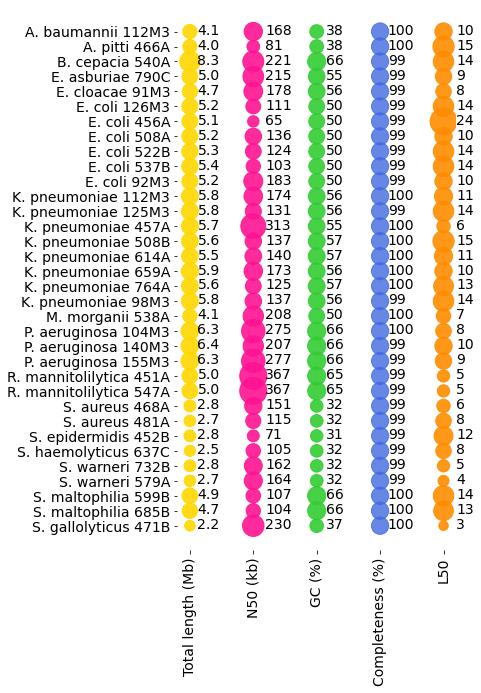

In [17]:
plt.figure(figsize = (5,10))
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)

plt.scatter('X','Y','S', data = tl, color = 'gold', alpha = .9)
Y = -0.2
for a in datastr['Total length (Mb)']:
    plt.text(x = 0.12, y = Y, s = a, fontsize = 14)
    Y += 1
    
plt.scatter('X','Y','S', data = n50, color = 'deeppink', alpha = .9)
Y = -0.2
for a in datastr['N50 (kb)']:
    plt.text(x = 1.19, y = Y, s = a, fontsize = 14)
    Y += 1
    
plt.scatter('X','Y','S', data = gc, color = 'limegreen', alpha = .9)
Y = -0.2
for a in datastr['GC (%)']:
    plt.text(x = 2.14, y = Y, s = a, fontsize = 14)
    Y += 1
    
plt.scatter('X','Y','S', data = comp, color = 'royalblue', alpha = .8)
Y = -0.2
for a in datastr['Completeness (%)']:
    plt.text(x = 3.12, y = Y, s = a, fontsize = 14)
    Y += 1
plt.scatter('X','Y','S', data = l50, color = 'darkorange', alpha = .9)
Y = -0.2
for a in datastr['L50']:
    plt.text(x = 4.2, y = Y, s = a, fontsize = 14)
    Y += 1
plt.box(on=None)
plt.savefig('bubbleplot.pdf',bbox_inches='tight', dpi = 600)